In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
data = pd.read_csv("processed_data/data.csv")
hist_data = pd.read_csv("processed_data/hist_data.csv")

In [3]:
data = data.drop("Unnamed: 0", axis=1)
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


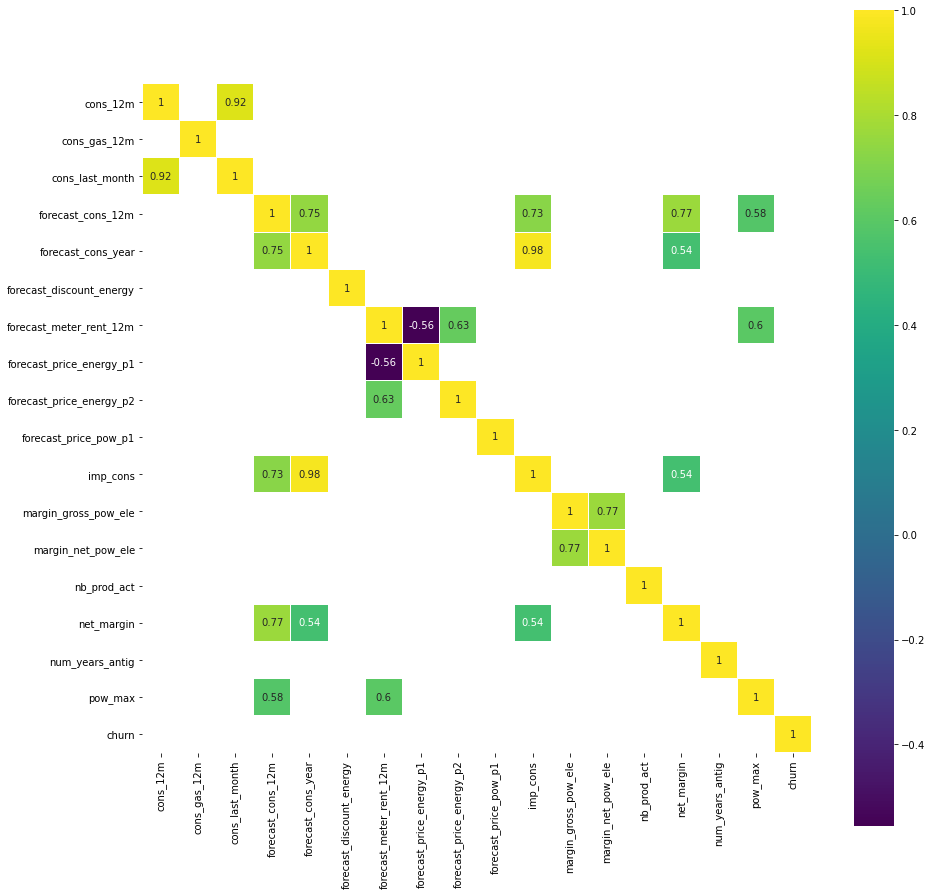

In [4]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)], square=True, cmap='viridis', annot=True, linewidths=0.1)

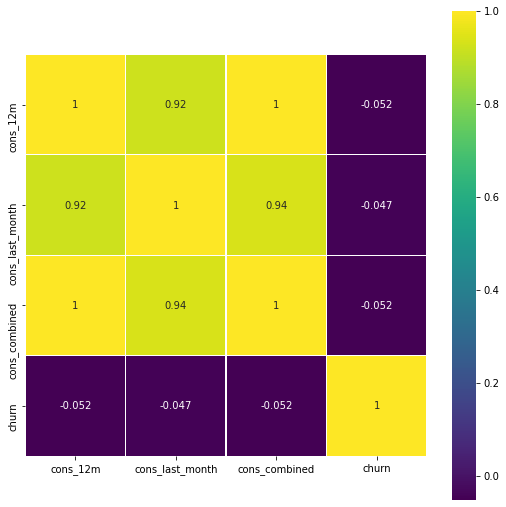

In [5]:
df = pd.DataFrame()
df['cons_12m'] = data['cons_12m']
df['cons_last_month'] = data['cons_last_month']
df['cons_combined'] = data['cons_12m'] + data['cons_last_month']
df['churn'] = data['churn']

corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_matrix[(corr_matrix >= 0) | (corr_matrix <= 0)], square=True, cmap='viridis', annot=True, linewidths=0.1)

### Based on the matrix, we can see that 'cons_12m' and 'cons_last_month' are highly correlated
### So, we have 2 options 
#### 1. Delete cons_last_month as it has a correlation on -0.047 with churn and 0.92 with cons_12m 
#### 2. Combine these 2 features and create a new feature called cons_combined. Based on the matirix, we can see that the final correlation stays the same at -0.052 but the its correlation with cons_12m is 1 that is 100% linear correlation whereas its correlatio  with cons_last_month increased from 0.92 to 0.94. So, we can delete both the old features and use just the newly created feature. 

In [6]:
data['cons_combined'] = data['cons_12m'] + data['cons_last_month']
data.drop(['cons_12m', 'cons_last_month'], axis=1, inplace=True)
data.head()

,id,channel_sales,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,cons_combined
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,...,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,319300
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0
2,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,...,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,4660
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,...,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,544
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,...,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1584


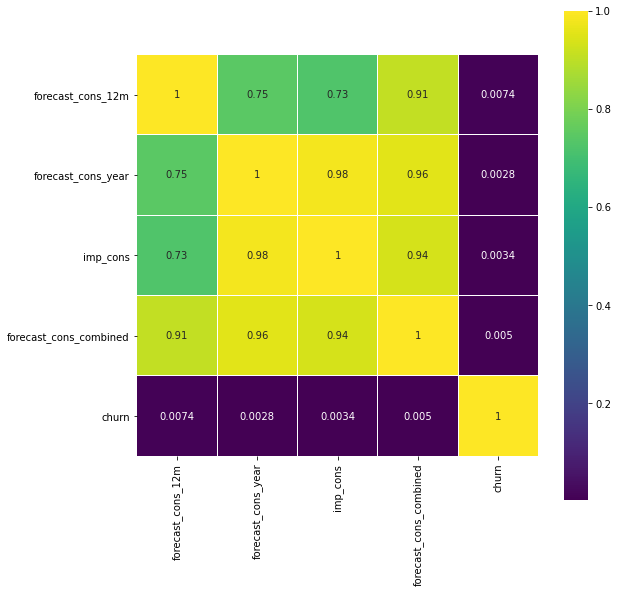

In [7]:
df = pd.DataFrame()
df['forecast_cons_12m'] = data['forecast_cons_12m']
df['forecast_cons_year'] = data['forecast_cons_year']
df['imp_cons'] = data['imp_cons']
df['forecast_cons_combined'] = data['imp_cons'] + data['forecast_cons_12m'] + data['forecast_cons_year']
df['churn'] = data['churn']

corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_matrix[(corr_matrix >= 0) | (corr_matrix <= 0)], square=True, cmap='viridis', annot=True, linewidths=0.1)

### Similar to the previous case, we will use the new feature and remove 'forecast_cons_12m', 'forecast_cons_year', and 'imp_cons'

In [8]:
data['forecast_cons_combined'] = data['imp_cons'] + data['forecast_cons_12m'] + data['forecast_cons_year']
data.drop(['imp_cons', 'forecast_cons_12m', 'forecast_cons_year'], axis=1, inplace=True)
data.head()

,id,channel_sales,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,cons_combined,forecast_cons_combined
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0.0,359.29,0.095919,...,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,319300,37377.10
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,1.78,0.114481,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0,0.00
2,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,16.27,0.145711,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,4660,189.95
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,38.72,0.165794,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,544,47.96
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,19.83,0.146694,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1584,240.04


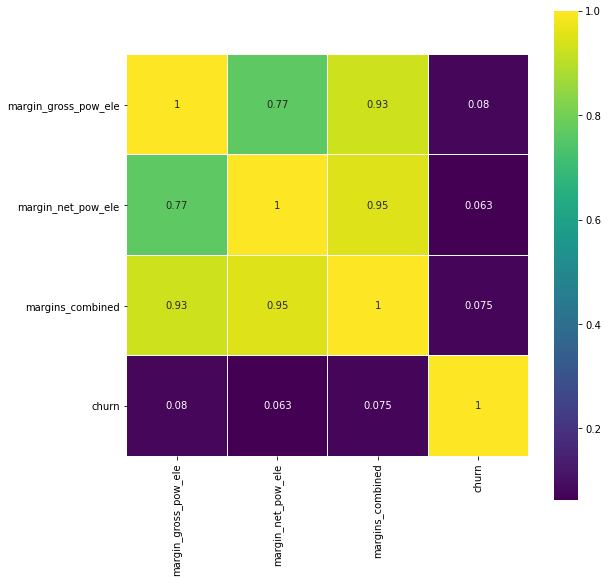

In [9]:
df = pd.DataFrame()
df['margin_gross_pow_ele'] = data['margin_gross_pow_ele']
df['margin_net_pow_ele'] = data['margin_net_pow_ele']
df['margins_combined'] = data['margin_gross_pow_ele'] + data['margin_net_pow_ele']
df['churn'] = data['churn']

corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_matrix[(corr_matrix >= 0) | (corr_matrix <= 0)], square=True, cmap='viridis', annot=True, linewidths=0.1)

### Similar to the previous case, we will use the new feature and remove 'margin_gross_pow_ele' and 'margin_net_pow_ele'

In [10]:
data['margins_combined_ele'] = data['margin_gross_pow_ele'] + data['margin_net_pow_ele']
data.drop(['margin_gross_pow_ele', 'margin_net_pow_ele'], axis=1, inplace=True)
data.head()

,id,channel_sales,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,has_gas,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,cons_combined,forecast_cons_combined,margins_combined_ele
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0.0,359.29,0.095919,...,f,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,319300,37377.10,-83.52
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,1.78,0.114481,...,t,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0,0.00,50.88
2,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,16.27,0.145711,...,f,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,4660,189.95,32.76
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,38.72,0.165794,...,f,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,544,47.96,57.20
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,19.83,0.146694,...,f,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1584,240.04,60.44


In [11]:
churn = data.pop('churn')
data['churn'] = churn
data.head()

,id,channel_sales,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,has_gas,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,cons_combined,forecast_cons_combined,margins_combined_ele,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0.0,359.29,0.095919,...,f,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,319300,37377.10,-83.52,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,1.78,0.114481,...,t,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0,0.00,50.88,1
2,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,16.27,0.145711,...,f,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,4660,189.95,32.76,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,38.72,0.165794,...,f,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,544,47.96,57.20,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,19.83,0.146694,...,f,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1584,240.04,60.44,0


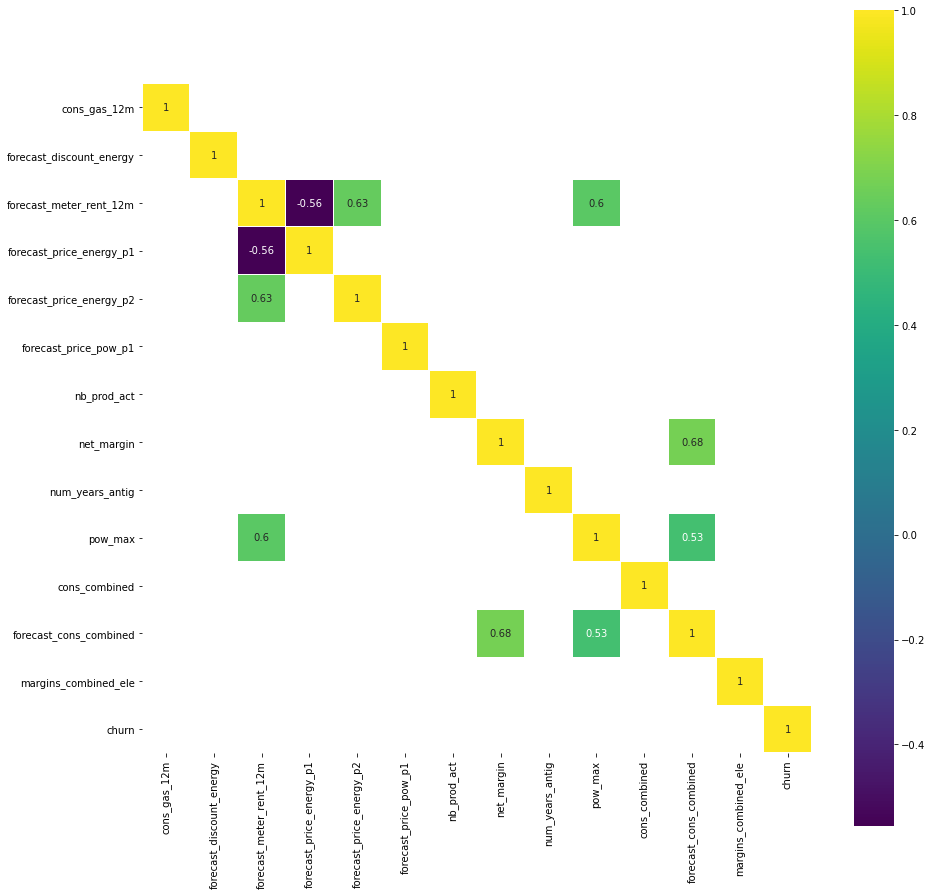

In [12]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)], square=True, cmap='viridis', annot=True, linewidths=0.1)

In [13]:
numeric_features = []
for col in data:
    if data[col].dtypes != "object":
        numeric_features.append(col)

z_scores = stats.zscore(data[numeric_features])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_data = data[filtered_entries]
print("Removed ", data.shape[0] - new_data.shape[0], "rows")

Removed  3793 rows


### By the above processed we have removed some collinearity from the data to reduce bias or excessive focus on similar features so that the model is more robust and accurate.
### Further feature engineering will be done along with model development. We can identify any features that negatively affect the model by identifying feature importance. 

In [14]:
data.to_csv('processed_data/data-feature-engineered.csv')